# Lecture 10 Support Vector Machines
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron, Chapter 5

[Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/main/Notes/Images/3480_05_ML_Landscape.png)

## The Concept behing Support Vector Machines
* Two datasets have a gap between them
* Draw a line to separate the datasets
  * The distance from the closest datapoint to the separator is known as the __margin__
  * When the separator is in the middle, the margin is maximized for both datasets. This is known as the __maximal margin classifier__ (mmc)
  * This margin has two problems:
    1. Only works if data is linearly separable
    2. Sensitive to outliers - If you have a datapoint from one dataset that is near the other dataset, the mmc is decreased and misplaced. New datapoints near the second dataset could be classified in the first dataset
* Bias/Variance tradeoff
  * If we force all points to be correct, we have *low bias*. However, this overfits the data, so our predictions will often be incorrect, giving us a *high variance*
  * If we allow misclassifications, we have *high bias*, but the predictions are more accurate, giving us a *low variance*
* Allow misclassifications (or *margin violations*)
  * When we allow misclassifications, then we call that margin a __soft margin__
* Determine best soft margin
  * Use cross validation
  
Using a soft margin is a machine learning model known as a __soft margin classifier__, more commonly known as a __Support Vector Classifier__ (SVC)
* With 2-dimensional data, the SVC is a line
* With 3-dimensional data, the SVC is a plane
* ...
* With n dimensions, the SVC has n-1 dimensions

But what if there are multiple groups? For example, if a medicine is given in the right dosage, it will help fight the disease, but if the dosage is too high or too low, it will not fight the disease. What do we do?
* Add a dimension (or two) that is a combination of the other dimensions
* Doing this will move the data in a way that we can use a SVC
* This model is known as a __Support Vector Machine__ (SVM)

In the medicine example, take the dosage as one dimension. We'll add a second dimension by squaring it. When we square it


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

Text(0, 0.5, 'Petal Width (cm)')

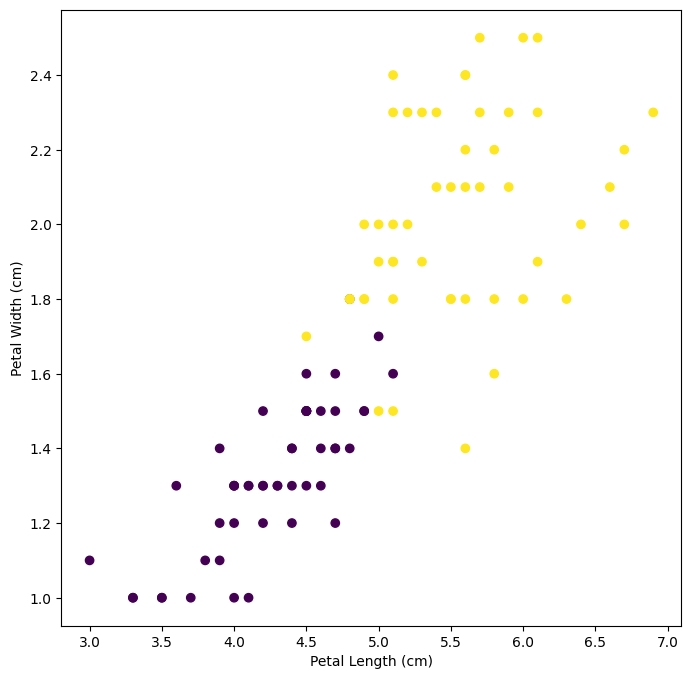

In [4]:
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot()
ax.scatter(#iris['data'][50:,0],
           iris['data'][50:,2],
           iris['data'][50:,3],
           c=iris['target'][:100])
          
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

## Preprocessing
1. Missing Data - No missing values in this example
2. Encode Categorical Variables - Using original data, no categorical variables
3. Split the data
4. Feature Scaling

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [8]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [11]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'],
                                                    test_size=0.20,
                                                    random_state=61)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:,0],
           X_train[:,2],
           X_train[:,3],
           c=y_train)
          
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')

## The KNN model

In [ ]:
np.sqrt(len(X_train))

In [ ]:
k=11

from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')
knn_class.fit(X_train,y_train)

In [ ]:
y_pred = knn_class.predict(X_test)

## Evaluate the model

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
fig = plt.figure(figsize=(8,16))

ax1 = fig.add_subplot(121, projection='3d')

ax1.scatter(X_test[:,0],
           X_test[:,2],
           X_test[:,3],
           c=y_test)
          
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_zlabel('Petal Width (cm)')

ax2 = fig.add_subplot(122, projection='3d')

ax2.scatter(X_test[:,0],
           X_test[:,2],
           X_test[:,3],
           c=y_pred)
          
ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Petal Length (cm)')
ax2.set_zlabel('Petal Width (cm)')

plt.show()